# Visueller Vergleich der Kennzeichnungen

Ein erster wichtiger Schritt beim Vergleich von Segmentierungsalgorithmen besteht darin, die Ergebnisse der einzelnen Algorithmen zu visualisieren und Unterschiede zwischen ihnen aufzuzeigen.

In [8]:
import numpy as np
from skimage.io import imread
from pyclesperanto_prototype import imshow
import matplotlib.pyplot as plt
import pandas as pd

Allein durch die Visualisierung der Bilder können wir erkennen, dass kein Paar der vier verglichenen Algorithmen dasselbe Kennzeichnungsbild erzeugt.

blobs_labels_imagej.tif


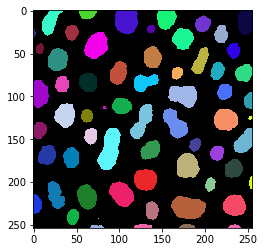

blobs_labels_skimage.tif


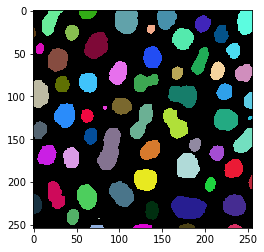

blobs_labels_clesperanto_python.tif


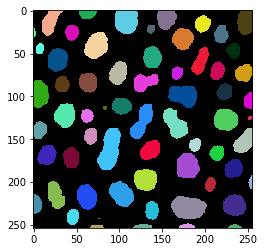

blobs_labels_clesperanto_imagej.tif


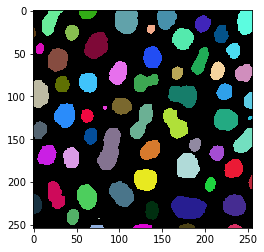

In [12]:
filenames = [
    "blobs_labels_imagej.tif",
    "blobs_labels_skimage.tif",
    "blobs_labels_clesperanto_python.tif",
    "blobs_labels_clesperanto_imagej.tif"
]

for filename in filenames:
    print(filename)
    label_image = imread(filename)
    imshow(label_image, labels=True)

Da entsprechende Objekte in dieser Visualisierung unterschiedliche Farben haben, können wir schließen, dass zumindest die Kennzeichnungen der Objekte unterschiedlich sind. Wir können noch nicht schlussfolgern, ob Otsus Schwellenwertmethode in den gegebenen Implementierungen unterschiedliche Ergebnisse liefert.

## Differenzbilder
Um die Überlappung zwischen den verschiedenen Bildern zu sehen, werden wir binäre Bilder aus den Kennzeichnungsbildern erstellen und die Differenz zwischen diesen binären Bildern visualisieren.

Wir vergleichen zunächst das Ergebnis von ImageJ und das Ergebnis von scikit-image, um das Verfahren zu demonstrieren.

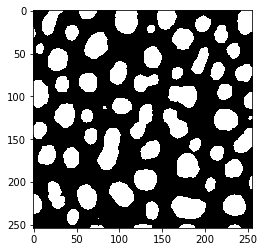

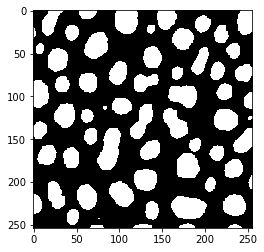

In [18]:
binary_blobs_imagej = imread(filenames[0]) > 0
binary_blobs_skimage = imread(filenames[1]) > 0
imshow(binary_blobs_imagej)
imshow(binary_blobs_skimage)

Wenn man diese beiden Bilder genau betrachtet, kann man bereits erkennen, dass die Objekte im zweiten Bild ein kleines bisschen größer sind.

Um das `Differenz`-Bild zu erzeugen, verwenden wir die [numpy `logical_xor` Methode](https://numpy.org/doc/stable/reference/generated/numpy.logical_xor.html). Sie setzt alle Pixel im `Differenz`-Bild auf 1, wo entweder eines der beiden Eingangsbilder `1` ist, aber nicht beide. Es wird als [exklusives ODER](https://de.wikipedia.org/wiki/Kontravalenz) bezeichnet.

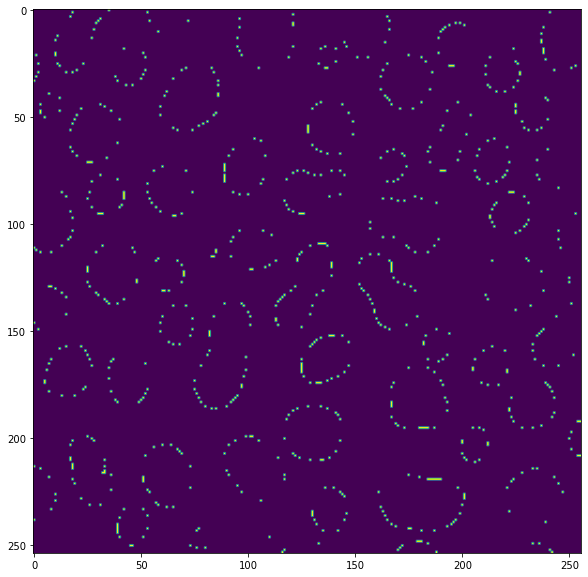

In [19]:
difference = np.logical_xor(binary_blobs_imagej, binary_blobs_skimage)

fig, axs = plt.subplots(figsize=(10,10))
axs.imshow(difference)

Aus diesem binären Bild können wir die Anzahl der Pixel zählen, die sich zwischen diesen beiden Ansätzen unterscheiden:

In [20]:
np.sum(difference)

830

## Eine Matrix der Differenz-Pixel-Zählungen
Wir werden nun zwei For-Schleifen programmieren, die über Paare von Kennzeichnungsbildern iterieren und sie mit demselben Ansatz vergleichen. Das Ergebnis wird eine 4x4-Matrix mit der Anzahl der Pixel sein, die sich beim Vergleich der entsprechenden Algorithmusimplementierungen unterscheiden.

In [23]:
matrix = {"Algorithms": filenames}

for filename_A in filenames:
    image_A = imread(filename_A)
    measurements = []
    for filename_B in filenames:
        image_B = imread(filename_B)
        
        difference = np.logical_xor(image_A, image_B)
        number_of_different_pixels = np.sum(difference)
        measurements.append(number_of_different_pixels)
    
    matrix[filename_A] = measurements

In [24]:
pd.DataFrame(matrix)

Algorithms  blobs_labels_imagej.tif  \
0              blobs_labels_imagej.tif                        0   
1             blobs_labels_skimage.tif                      830   
2  blobs_labels_clesperanto_python.tif                      830   
3  blobs_labels_clesperanto_imagej.tif                      830   

   blobs_labels_skimage.tif  blobs_labels_clesperanto_python.tif  \
0                       830                                  830   
1                         0                                    0   
2                         0                                    0   
3                         0                                    0   

   blobs_labels_clesperanto_imagej.tif  
0                                  830  
1                                    0  
2                                    0  
3                                    0

Aus dieser Matrix können wir schließen, dass sich nur das ImageJ-Ergebnis von den anderen drei Implementierungen unterscheidet.

## Übung
Wir sollten auch schnell bestätigen, indem wir ein weiteres `Differenz`-Bild betrachten, zum Beispiel zwischen der clesperanto-Implementierung in Jython und scikit-image in Python. Visualisieren Sie beide binären Bilder und das Differenzbild zwischen diesen beiden. Zählen Sie auch die Anzahl der Pixel, die sich zwischen diesen beiden Bildern unterscheiden.